<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/epidemiologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive
enable this if you want to save stuff in your google colab drive, ALSO cool table display only for drive

In [143]:
#from google.colab import drive
#drive.mount("/drive")
#directory = "/drive/My Drive/Colab Notebooks/epidemiologia/"
directory = ""

#interactive table
#from vega_datasets import data
#%load_ext google.colab.data_table

# Dependencias: important!
if adding new dependency, and notebook is linked to a github workflow, you must make sure all dependencies are also on the requirements.txt too! If not, github workflow will fail and you wiill be very, very sad.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


#dates
import matplotlib.dates as mdates


# CASOS

Casos diarios y acumulados

In [152]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,1,0,0,1
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,1,6,0,0,0,0,0,7
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-20,139,294,337,40,99,22,121,19,15,1086
2021-06-21,113,213,188,34,47,24,115,17,13,764
2021-06-22,153,124,390,68,74,148,658,35,17,1667
2021-06-23,154,419,469,79,166,148,738,84,13,2270


In [153]:
casos_diarios7 = casos_diarios.rolling(7).mean()
#casos_diarios7

In [154]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,1,0,0,1
2020-03-12,0,0,0,0,0,0,1,0,0,1
2020-03-13,0,0,1,6,0,0,1,0,0,8
2020-03-14,0,0,1,6,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...
2021-06-20,25332,87977,61296,21640,19287,32597,148086,19325,6506,422046
2021-06-21,25445,88190,61484,21674,19334,32621,148201,19342,6519,422810
2021-06-22,25598,88314,61874,21742,19408,32769,148859,19377,6536,424477
2021-06-23,25752,88733,62343,21821,19574,32917,149597,19461,6549,426747


NameError: ignored

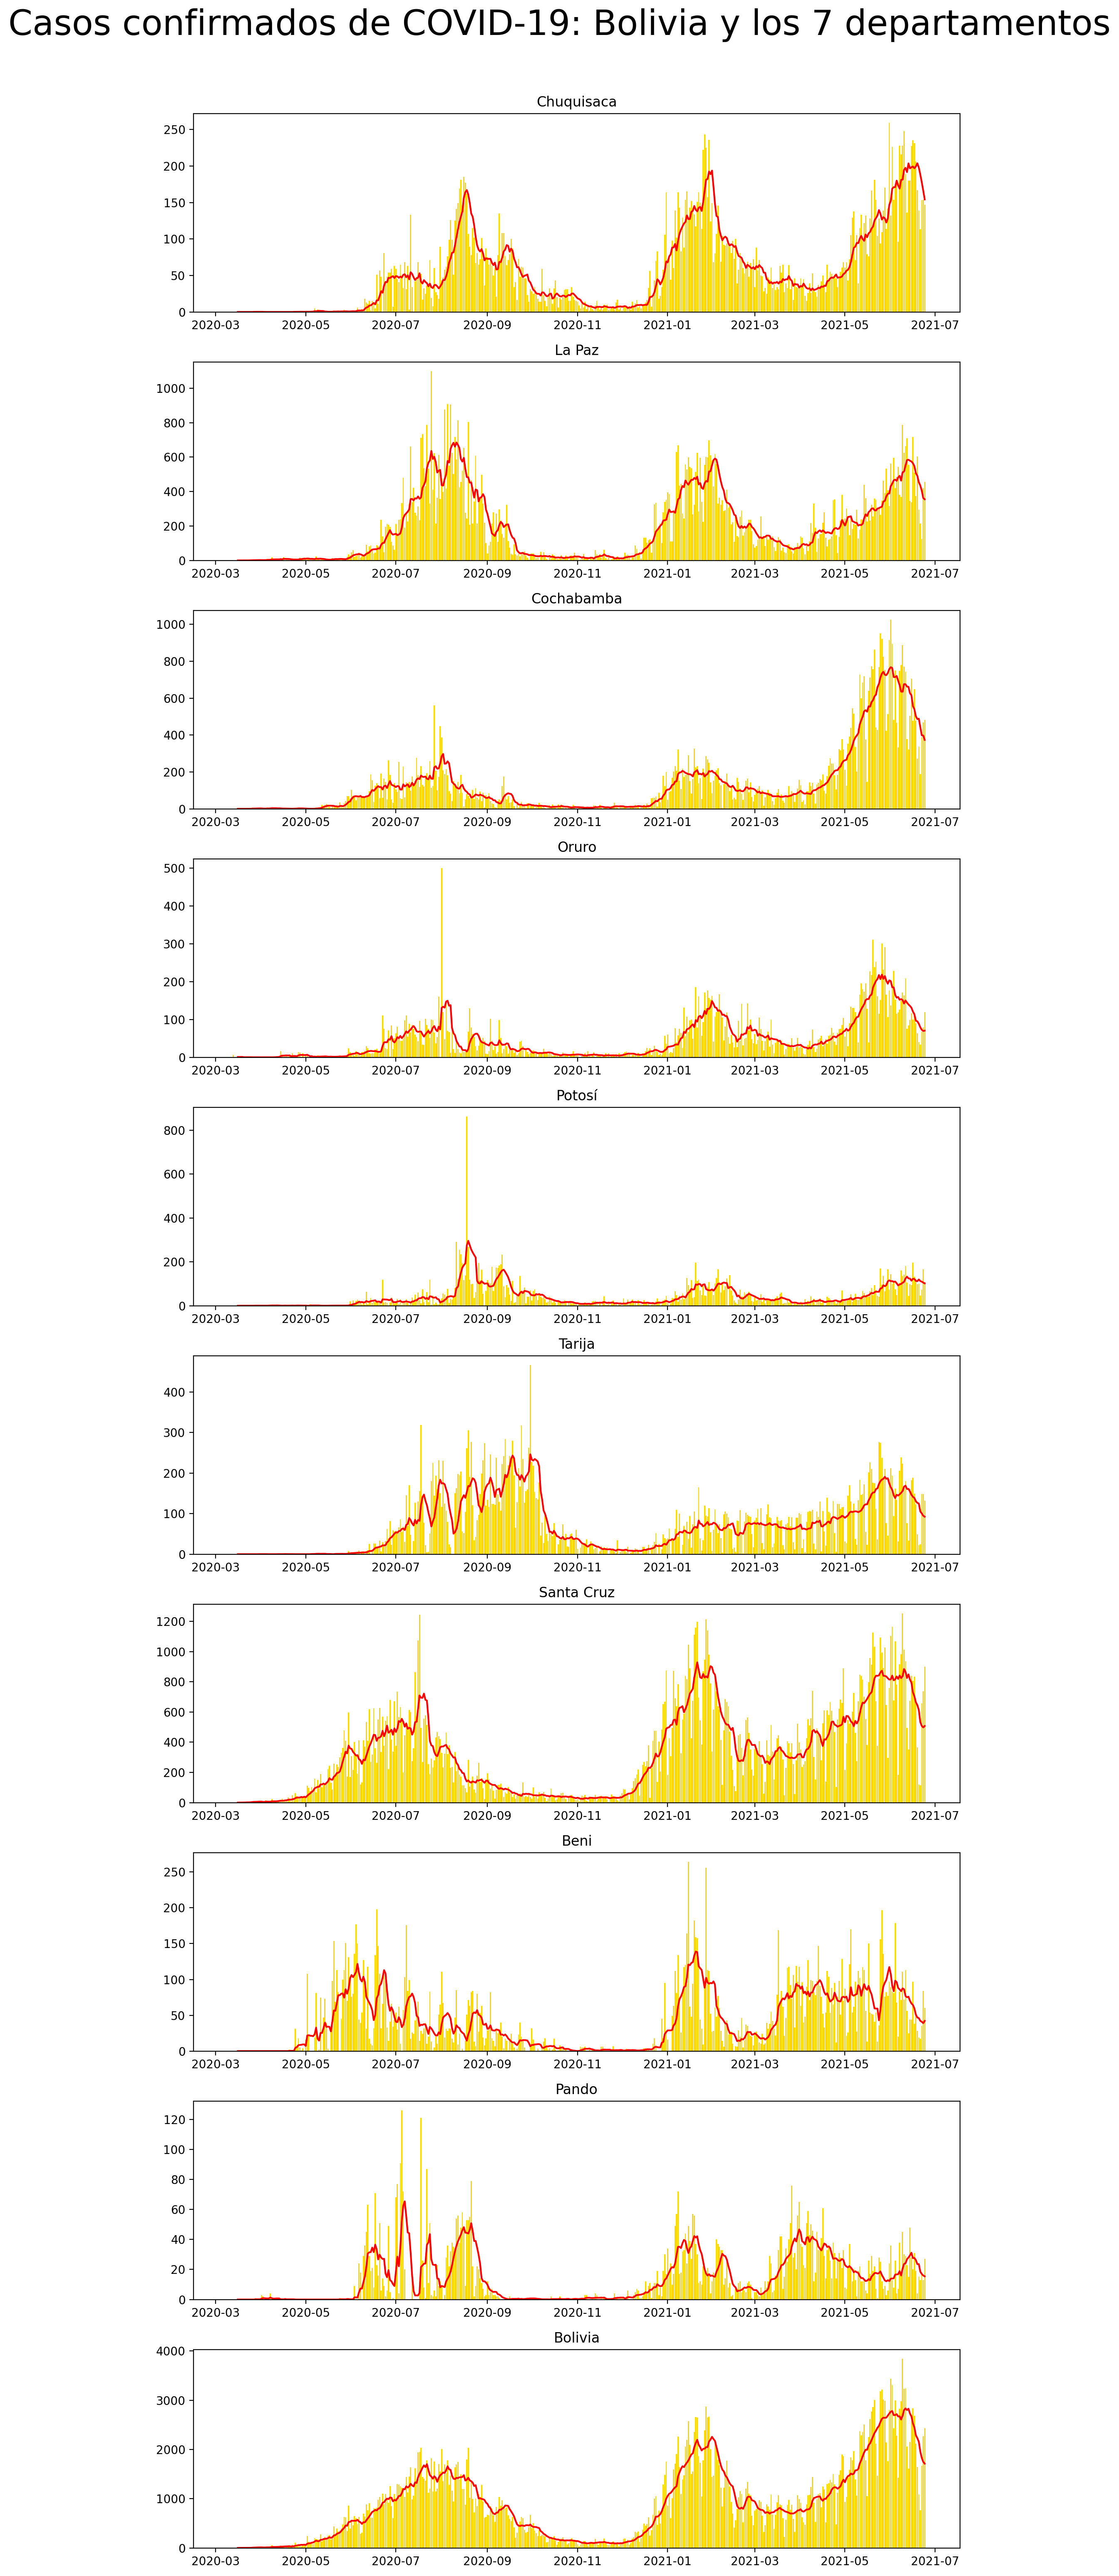

In [163]:
fig, axs = plt.subplots(10,1, figsize = (10,30), dpi=200)

fig.suptitle("Casos confirmados de COVID-19: Bolivia y los 7 departamentos", fontsize= 28, y=1.03)

for i in range(10):
  axs[i].bar(casos_diarios.index, casos_diarios[casos_diarios.columns[i]], color = "gold")
  axs[i].set_title(casos_diarios.columns[i])
  axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r") 

fig.tight_layout()

fig.savefig("graficas/casos_todos.png")

# Muertes

Muertes diarias y acumuladas

In [156]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-20,4,5,19,2,5,4,4,1,0,44
2021-06-21,8,8,11,0,2,2,7,1,3,42
2021-06-22,6,6,20,5,7,4,15,3,3,69
2021-06-23,6,4,24,8,3,5,35,1,0,86


In [157]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-20,1115,2255,2397,1083,664,826,5042,822,301,14505
2021-06-21,1123,2263,2408,1083,666,828,5049,823,304,14547
2021-06-22,1129,2269,2428,1088,673,832,5064,826,307,14616
2021-06-23,1135,2273,2452,1096,676,837,5099,827,307,14702


# Pruebas
Pruebas procesadas. Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [ ]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
pruebas_edu.index = pd.to_datetime(pruebas_edu.index)

pruebas_edu



In [ ]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [ ]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")

#descartados

In [ ]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

In [ ]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).interpolate()
pruebas_acum.plot(figsize = (15,7))
plt.legend()

pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.tail()

In [ ]:
pruebas_acum.to_csv("pruebas_acum.csv")

In [ ]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias.rolling(7,min_periods=1).mean().interpolate().plot(figsize = (15,7))
#ax.plot(pruebas_diarias.index, pruebas_diarias)
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%M"))
# ax.grid()
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias

In [ ]:
axs = pruebas_diarias.rolling(7).mean().interpolate().plot(
                                                           subplots=True,
                                                           layout=(5,2),
                                                           sharey=False,
                                                           figsize = (20,8),
                                                           legend=True,
                                                           grid=True)

plt.suptitle("Pruebas de COVID-19 procesadas en regiones bolivianas", fontsize="24")
plt.legend(loc="upper left")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

In [ ]:
positividad_diaria = casos_diarios / pruebas_diarias
positividad_diaria = positividad_diaria.drop(positividad_diaria.index[0:59])
positividad_diaria.plot(figsize = (20,7))

positividad_diaria.to_csv(directory + "positividad_diaria.csv")

positividad_diaria

In [ ]:
positividad_diaria_adj = positividad_diaria.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

In [ ]:
positividad_diaria_adj.plot(figsize = (20,8))
plt.grid()
plt.savefig(directory + "graficas/positividad_diaria_todos.jpg")

In [ ]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia', y=.95)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
  axs[i].legend()

plt.savefig(directory + "positividad.jpg")

In [ ]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
  axs[i].legend()
  axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


plt.savefig(directory + "positividad_2021.jpg")